In [2]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [3]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [6]:
# copy demo into current directory
ac.copydemo('lin')

# start AUTO with runner object
runner = ra.runAUTO()

pgm = "lin"
print("\nDemo %s is started"%pgm)
print("\n%s : first run : compute trivial solutions and locate eigenvalues"%pgm)
r1 = ac.run(e=pgm,c=pgm,runner=runner)

print("\n%s : second run : compute a few steps on the bifurcating branch"%pgm)
r2 = ac.run(r1("BP1"),NTST=6,ISW=-1,DSMAX=0.5,A1=5.0,runner=runner)
ac.save(r1+r2,'lin')

print("\n%s : third run : compute a 2-parameter curve of eigenvalues"%pgm)
r3 = ac.run(r2("UZ1"),ICP=[1,2],NTST=5,ISW=1,runner=runner)
ac.save(r3,'2p')

Copying demo lin ... done

Demo lin is started

lin : first run : compute trivial solutions and locate eigenvalues
gfortran -fopenmp -O -c lin.f90 -o lin.o
gfortran -fopenmp -O lin.o -o lin.exe /auto/lib/*.o
Starting lin ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      PAR(3)     
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1     6  BP    2   1.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    12  BP    3   2.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    18  BP    4   3.00002E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    24  BP    5   4.00023E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    29  UZ    6   5.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00

 Total Time    0.262E-01


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


lin ... done

lin : second run : compute a few steps on the bifurcating branch
Starting lin ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      PAR(3)     
   2    10  UZ    7   1.00000E+00   3.29690E+00   0.00000E+00   4.44287E+00   9.99994E-01

 Total Time    0.168E-01
lin ... done
Saving to b.lin, s.lin, and d.lin ... done

lin : third run : compute a 2-parameter curve of eigenvalues
Starting lin ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      PAR(2)     
   2    23  EP    8   1.72433E+00   5.04425E+00   1.35095E+00   7.33418E+00   1.03136E+00

 Total Time    0.206E-01
lin ... done
Saving to b.2p, s.2p, and d.2p ... done


Created plot


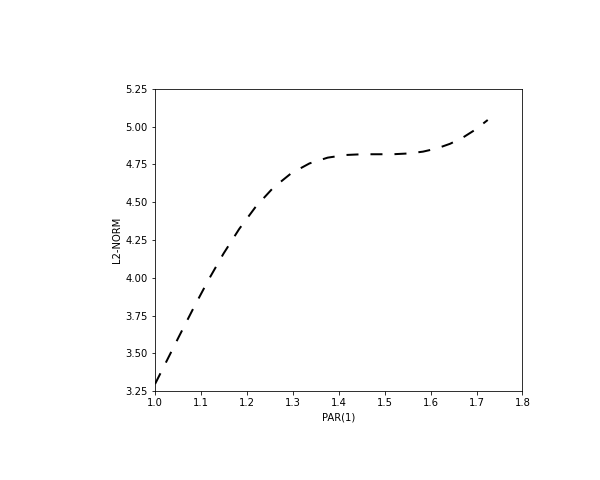

In [7]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('2p')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [8]:
# clean up files

ac.clean()
ac.delete('lin')
ac.delete('2p')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.lin ... done
Deleting s.lin ... done
Deleting d.lin ... done
Deleting b.2p ... done
Deleting s.2p ... done
Deleting d.2p ... done
